<a href="https://colab.research.google.com/github/zaaachos/Thesis-Diagnostic-Captioning/blob/main/notebooks/IU_Xray_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive

/content/drive/MyDrive


In [3]:
!ls

 46bff9d5-95d4-4362-be98-ef59819ec3af_ImageCLEFmedCaption_2022_concept_detection_valid.csv
 72d678c1-c535-491d-bc42-c2ba11f47165_concepts.csv
 b47c4f80-9432-408c-b69a-956a3382a0da_ImageCLEFmedCaption_2022_concept_detection_train.csv
 c856ae07-029b-449e-bd06-99c04d3ad1e0_ImageCLEFmedCaption_2022_caption_prediction_train.csv
 cc3d9c72-6c2b-4bd3-9d10-4e133031be48_ImageCLEFmedCaption_2022_caption_prediction_valid.csv
'Colab Notebooks'
 iu_xray.csv
 two_captions.json
 VID20220808185241.mp4


In [4]:
import pandas as pd
import json

all_data = 'iu_xray.csv'
two_patients = 'two_captions.json'

all_df = pd.read_csv(all_data, sep='\t', names=['ID', 'caption'])
all_df.head()

,ID,caption
0,CXR1_1_IM-0001-3001.png,Normal chest x-XXXX. The cardiac silhouette an...
1,CXR1_1_IM-0001-4001.png,Normal chest x-XXXX. The cardiac silhouette an...
2,CXR10_IM-0002-1001.png,No acute cardiopulmonary process. The cardiome...
3,CXR10_IM-0002-2001.png,No acute cardiopulmonary process. The cardiome...
4,CXR100_IM-0002-1001.png,No active disease. Both lungs are clear and ex...


In [5]:
all_df.describe()

,ID,caption
count,7430,7430
unique,7430,3066
top,CXR1_1_IM-0001-3001.png,No acute disease. The heart is normal in size....
freq,1,96


<BarContainer object of 5 artists>

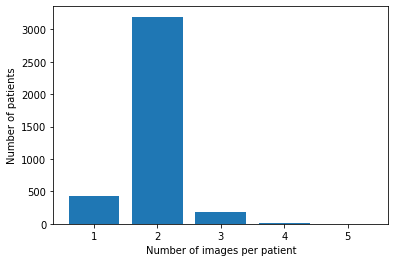

In [6]:
import matplotlib.pyplot as plt
patient_images = {}
for visit in all_df.ID.to_list():
    patient = visit[3:].split("_")[0]
    if patient in patient_images:
        patient_images[patient].append(visit)
    else:
        patient_images[patient] = [visit]


iuxray_ids_img1 = [patient_images[patient][0] for patient in patient_images if len(patient_images[patient])==1]
iuxray_ids_img2 = [patient_images[patient][0] for patient in patient_images if len(patient_images[patient])==2]
iuxray_ids_img3 = [patient_images[patient][0] for patient in patient_images if len(patient_images[patient])==3]
iuxray_ids_img4 = [patient_images[patient][0] for patient in patient_images if len(patient_images[patient])==4]
iuxray_ids_img5 = [patient_images[patient][0] for patient in patient_images if len(patient_images[patient])==5]
samples = [len(iuxray_ids_img1), len(iuxray_ids_img2), len(iuxray_ids_img3), len(iuxray_ids_img4), len(iuxray_ids_img5)]
number = [1, 2, 3, 4, 5]

plt.xlabel('Number of images per patient')
plt.ylabel('Number of patients')
plt.bar(number, samples)

In [7]:
import numpy as np

with open(two_patients) as f:
  data = json.load(f)
captions = list(data.values())
words_per_sent = list()
for caption in captions:
  tokenized_caption = caption.split()
  words_per_sent.append(len(tokenized_caption))

print(f'Minimum word-tokens in a caption: {min(words_per_sent)} (Occurences: {sum(np.array(words_per_sent)==min(words_per_sent))} times)')
print(f'Maximum word-tokens in a caption: {max(words_per_sent)} (Occurences: {sum(np.array(words_per_sent)==max(words_per_sent))} times)')
print('mean number of words in captions:', round(np.mean(words_per_sent),2))

Minimum word-tokens in a caption: 3 (Occurences: 10 times)
Maximum word-tokens in a caption: 176 (Occurences: 1 times)
mean number of words in captions: 37.27


{'whiskers': [<matplotlib.lines.Line2D at 0x7f12f385d990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f12f3867450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f12f385d3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f12f3867950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f12f3867cd0>],
 'means': []}

<Figure size 2160x1080 with 0 Axes>

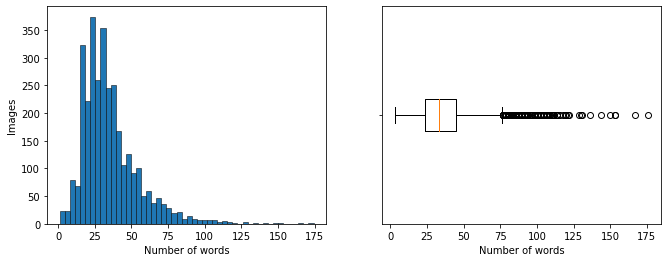

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(11, 4))

ax1.hist(words_per_sent, bins=50, align='left', edgecolor='black',
              linewidth=0.5)
 
# Add axis labels
ax1.set(xlabel='Number of words', ylabel='Images')

 
# plt.show()
ax2.set(xlabel='Number of words', ylabel='')
ax2.set_yticklabels(' ')
ax2.boxplot(words_per_sent, vert=False)

In [9]:
import collections
counters = collections.Counter(captions)

df = pd.DataFrame.from_records(counters.most_common(), columns=['caption','count'])
df.head()

,caption,count
0,No acute disease. The heart is normal in size....,42
1,No active disease. The heart and lungs have XX...,37
2,Normal chest Heart size normal. Lungs are clea...,30
3,No active disease. Both lungs are clear and ex...,26
4,No acute cardiopulmonary abnormality.. The lun...,25


In [10]:
freqs_list = {}
for counts in df['count'].to_list():
  if counts in freqs_list:
    freqs_list[counts] += 1
  else:
    freqs_list[counts] = 1
from pprint import pprint
pprint(freqs_list)

{1: 2415,
 2: 47,
 3: 31,
 4: 10,
 5: 18,
 6: 4,
 7: 6,
 8: 9,
 9: 3,
 10: 4,
 11: 2,
 12: 1,
 13: 1,
 16: 2,
 19: 1,
 25: 1,
 26: 1,
 30: 1,
 37: 1,
 42: 1}


In [11]:
print(f'About {round(round(freqs_list[1]/len(captions)*100,2))}% of the captions are unique.')

About 76% of the captions are unique.


In [12]:
import tensorflow
import keras
from keras.preprocessing.text import Tokenizer
from collections import Counter
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
ordered = Counter(tokenizer.word_counts)
# top 10
print('Top10 frequent')
ordered.most_common(10)

Vocabulary Size: 1874
Top10 frequent


[('no', 6235),
 ('the', 5639),
 ('are', 3819),
 ('is', 3770),
 ('normal', 3372),
 ('xxxx', 2820),
 ('of', 2737),
 ('and', 2736),
 ('acute', 2511),
 ('pleural', 2330)]

In [13]:
from nltk.corpus import stopwords # Import the stop word list
from nltk.tokenize import wordpunct_tokenize
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
dictionary_wo_stopwords = {k:v for k,v in tokenizer.word_counts.items() if k not in stop_words}

ordered_wo = Counter(dictionary_wo_stopwords)
# top 10
print('Most frequent words w/o stopwords')
ordered_wo.most_common(10)

Most frequent words w/o stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('normal', 3372),
 ('xxxx', 2820),
 ('acute', 2511),
 ('pleural', 2330),
 ('pneumothorax', 2102),
 ('effusion', 2049),
 ('heart', 2028),
 ('lungs', 1983),
 ('size', 1854),
 ('clear', 1585)]

In [14]:
print(f'There are {sum(np.array(list(ordered.values()))==1)} words with only 1 occurence')

There are 529 words with only 1 occurence
